In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv('E:\DATA Science\Machine Learning\CAR DETAILS.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Understanding the Data

In [5]:
print(data.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Handle Missing Values

In [7]:
print(data.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


# Handle Outliers

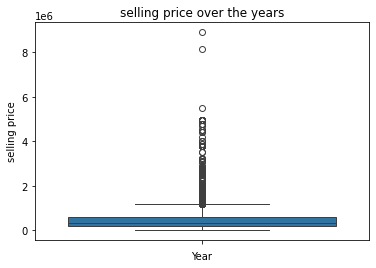

In [8]:
sns.boxplot(data['selling_price'])
plt.title('selling price over the years')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('selling price')
plt.show()

# Correct Inconsistent Data

In [9]:
print(data['fuel'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [10]:
print(data['transmission'].unique())

['Manual' 'Automatic']


In [11]:
print(data['name'].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [12]:
data['fuel'] = data['fuel'].str.strip().str.lower()

# Convert Data Types

In [13]:
data['year'] = data['year'].astype(int)
data['selling_price'] = data['selling_price'].astype(float)
data['km_driven'] = data['km_driven'].astype(float)

# Create New Features

In [14]:
data['car_age'] = 2024 - data['year']

# Selling Price Distribution

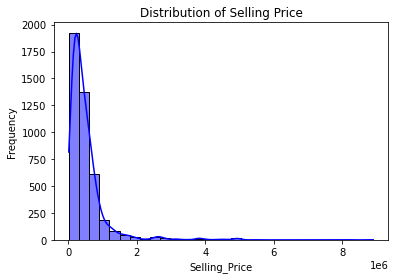

In [15]:
sns.histplot(data['selling_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.show()

# Year of Manufacture

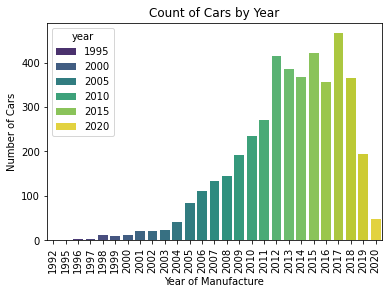

In [16]:
sns.countplot(x='year', data=data, hue="year", palette='viridis')
plt.title('Count of Cars by Year')
plt.xticks(rotation=90)
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.show()

# Fuel Type Distribution

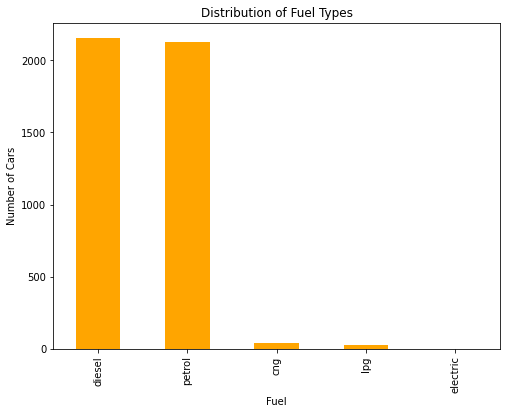

In [17]:
fuel_counts = data['fuel'].value_counts()
fuel_counts.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel')
plt.ylabel('Number of Cars')
plt.show()

# Bivariate Analysis (Relationships Between Two Variables)

# Selling Price vs. Year

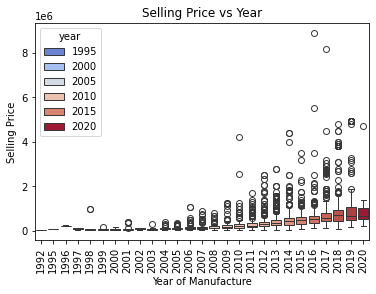

In [18]:
sns.boxplot(x='year', y='selling_price', data=data, hue="year", palette='coolwarm')
plt.title('Selling Price vs Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

# Selling Price vs. Fuel Type

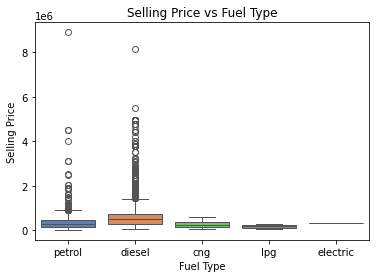

In [19]:
sns.boxplot(x='fuel', y='selling_price', data=data, hue="fuel", palette='muted')
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

# Selling Price vs. Kilometer Driven

<Figure size 576x432 with 0 Axes>

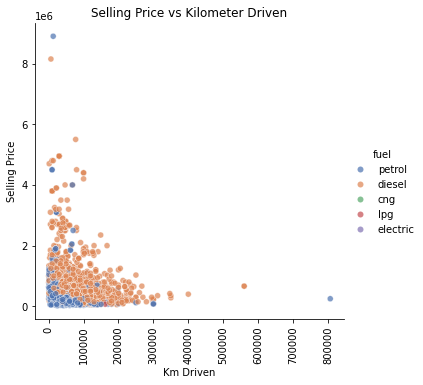

In [20]:
plt.figure(figsize=(8, 6))
sns.relplot(x = 'km_driven', y = 'selling_price', data=data, hue='fuel', palette='deep', alpha=0.7)
plt.title('Selling Price vs Kilometer Driven')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis

# Fuel Type, Transmission, and Selling Price

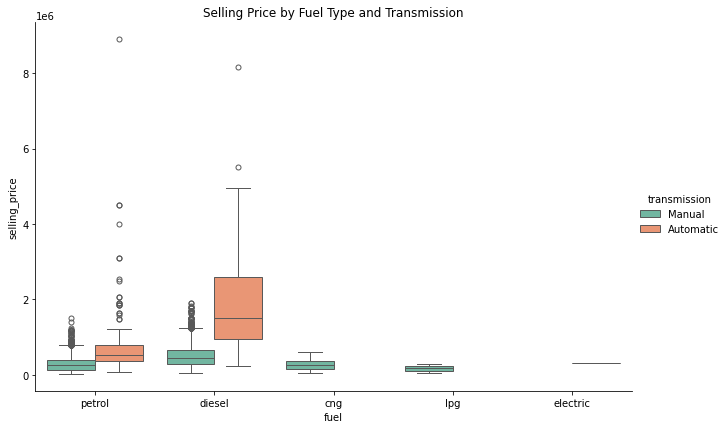

In [21]:
sns.catplot(x='fuel', y='selling_price', hue='transmission', kind='box', data=data, height=6, aspect=1.5, palette='Set2')
plt.title('Selling Price by Fuel Type and Transmission')
plt.show()

# Owner Type vs Selling Price

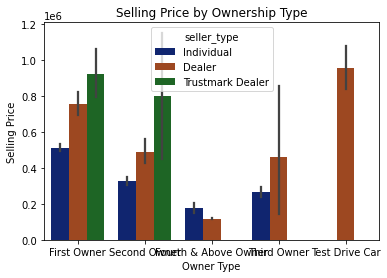

In [22]:
sns.barplot(x='owner', y='selling_price', data=data, hue="seller_type", palette='dark')
plt.title('Selling Price by Ownership Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()

# Correlation Analysis

# Correlation Heatmap

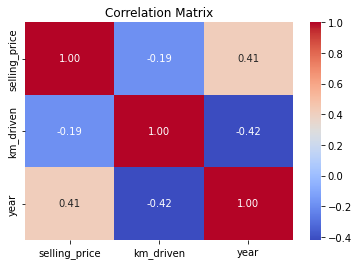

In [23]:
corr = data[['selling_price', 'km_driven', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pair Plot

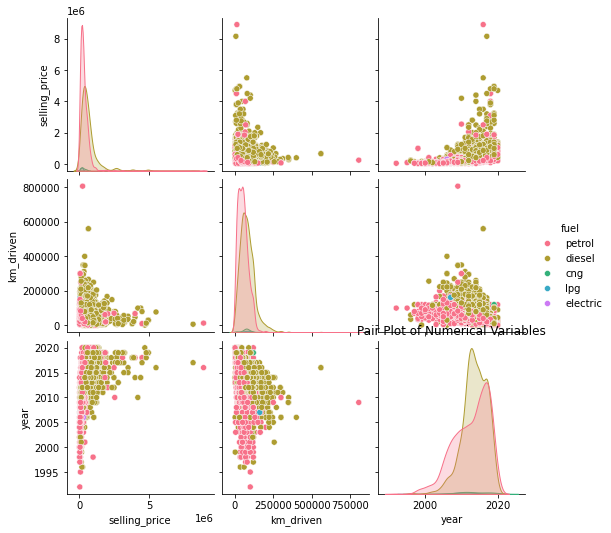

In [24]:
sns.pairplot(data, vars=['selling_price', 'km_driven', 'year'], hue='fuel', palette='husl')
plt.title('Pair Plot of Numerical Variables')
plt.show()

# Save the Graphs

In [25]:
plt.savefig('graph_name.png')

<Figure size 432x288 with 0 Axes>

In [27]:
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000.0,70000.0,petrol,Individual,Manual,First Owner,17
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,petrol,Individual,Manual,First Owner,17
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,diesel,Individual,Manual,First Owner,12


# Drop Irrelevant Columns

In [28]:
data.drop(columns=['name'], inplace=True)

In [30]:
print(data['seller_type'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']


In [31]:
print(data['owner'].unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


# Encode Categorical values

In [49]:
data.replace({'fuel':{'petrol':0, 'diesel':1, 'cng':2, 'electric':3, 'lpg':4}}, inplace=True)
data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [50]:
data.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace=True)
data.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

In [51]:
data.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,2007,60000.0,70000.0,0,0,0,0,17
1,2007,135000.0,50000.0,0,0,0,0,17


# Check for Multicollinearity

In [52]:
correlation_matrix = data.corr()
print(correlation_matrix['selling_price'].sort_values(ascending=False))

selling_price    1.000000
transmission     0.530205
year             0.413922
seller_type      0.240666
fuel             0.211155
km_driven       -0.192289
owner           -0.198833
car_age         -0.413922
Name: selling_price, dtype: float64


In [53]:
categorical_columns = ['fuel', 'transmission', 'owner']

# Split Features and Target Variable

In [54]:
X = data.drop(columns=['selling_price'])  # Features
y = data['selling_price']                # Target variable

# Train-Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (3472, 7)
Testing set size: (868, 7)


# Standardize Numerical Features

In [56]:
scaler = StandardScaler()
numerical_columns = ['km_driven', 'car_age']

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Handle Outliers

In [58]:
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Apply capping
data['km_driven'] = np.where(data['km_driven'] < Q1 - 1.5 * IQR, Q1 - 1.5 * IQR,
                                    np.where(data['km_driven'] > Q3 + 1.5 * IQR, Q3 + 1.5 * IQR,
                                             data['km_driven']))

# Final Dataset Overview

In [59]:
print(X_train.shape, X_test.shape)
print(X_train[:5])  # View a sample of the transformed training data

(3472, 14) (868, 14)
[[-0.98114024 -0.92342078  0.          1.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.        ]
 [-0.34146273 -1.16122801  0.          1.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.        ]
 [-0.87452732  0.0278081   1.          0.          0.          0.
   0.          1.          0.          0.          1.          0.
   0.          0.        ]
 [ 0.08498894  0.50342255  0.          1.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.        ]
 [ 0.12763411 -0.92342078  0.          1.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.        ]]


# Save the Processed Data (Optional)

In [60]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

# Import Required Libraries

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [62]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics for training and testing data
    metrics = {
        'Model': model.__class__.__name__,
        'Train_R2': r2_score(y_train, y_pred_train),
        'Test_R2': r2_score(y_test, y_pred_test),
        'MAE': mean_absolute_error(y_test, y_pred_test),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    }
    return metrics

# Train and Evaluate Models

# Linear Regression

In [63]:
lr = LinearRegression()
lr_metrics = evaluate_model(lr, X_train, y_train, X_test, y_test)
print(lr_metrics)

{'Model': 'LinearRegression', 'Train_R2': 0.46608697384029407, 'Test_R2': 0.39885608946336826, 'MAE': 220518.03676947276, 'RMSE': 428312.10484464664}


# Ridge Regression

In [64]:
ridge = Ridge(alpha=1.0)
ridge_metrics = evaluate_model(ridge, X_train, y_train, X_test, y_test)
print(ridge_metrics)

{'Model': 'Ridge', 'Train_R2': 0.4660090175625199, 'Test_R2': 0.3989753992060616, 'MAE': 220487.24458444392, 'RMSE': 428269.59893055825}


# Lasso Regression

In [65]:
lasso = Lasso(alpha=0.1)
lasso_metrics = evaluate_model(lasso, X_train, y_train, X_test, y_test)
print(lasso_metrics)

{'Model': 'Lasso', 'Train_R2': 0.4660869737198763, 'Test_R2': 0.3988559867558461, 'MAE': 220518.2906148089, 'RMSE': 428312.14143394947}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.194e+13, tolerance: 1.187e+11
  model = cd_fast.enet_coordinate_descent(


# Decision Tree Regressor

In [67]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_metrics = evaluate_model(dt, X_train, y_train, X_test, y_test)
print(dt_metrics)

{'Model': 'DecisionTreeRegressor', 'Train_R2': 0.8988824293874517, 'Test_R2': 0.36446722743296334, 'MAE': 182207.8942596924, 'RMSE': 440392.6861567896}


# Random Forest Regressor

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_metrics = evaluate_model(rf, X_train, y_train, X_test, y_test)
print(rf_metrics)

{'Model': 'RandomForestRegressor', 'Train_R2': 0.9259574093243818, 'Test_R2': 0.4794514799797742, 'MAE': 172632.87956055725, 'RMSE': 398567.36039904674}


# Gradient Boosting Regressor

In [69]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_metrics = evaluate_model(gbr, X_train, y_train, X_test, y_test)
print(gbr_metrics)

{'Model': 'GradientBoostingRegressor', 'Train_R2': 0.7410623238093066, 'Test_R2': 0.45416102498106514, 'MAE': 181267.6347574056, 'RMSE': 408134.5809443599}


# Bagging Regressor

In [70]:
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_metrics = evaluate_model(bagging, X_train, y_train, X_test, y_test)
print(bagging_metrics)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Model': 'BaggingRegressor', 'Train_R2': 0.9239127452663733, 'Test_R2': 0.47940196388009737, 'MAE': 172407.6936586811, 'RMSE': 398586.3163955429}


# Aggregate and Compare Results

In [71]:
import pandas as pd

# Collect metrics
results = pd.DataFrame([lr_metrics, ridge_metrics, lasso_metrics, dt_metrics, rf_metrics, gbr_metrics, bagging_metrics])
print(results.sort_values(by='Test_R2', ascending=False))  # Sort by Test R2 Score

                       Model  Train_R2   Test_R2            MAE           RMSE
4      RandomForestRegressor  0.925957  0.479451  172632.879561  398567.360399
6           BaggingRegressor  0.923913  0.479402  172407.693659  398586.316396
5  GradientBoostingRegressor  0.741062  0.454161  181267.634757  408134.580944
1                      Ridge  0.466009  0.398975  220487.244584  428269.598931
0           LinearRegression  0.466087  0.398856  220518.036769  428312.104845
2                      Lasso  0.466087  0.398856  220518.290615  428312.141434
3      DecisionTreeRegressor  0.898882  0.364467  182207.894260  440392.686157


# Save the Best Model

In [73]:
import joblib

# Save the model
joblib.dump(rf, 'best_car_price_model.pkl')

['best_car_price_model.pkl']

# Load the Saved Model

In [74]:
# Load the model
loaded_model = joblib.load('best_car_price_model.pkl')

# Save the Best Model

In [76]:
import joblib

# Assume 'rf' is the best model (e.g., Random Forest Regressor)
best_model = rf

# Save the model to a file
joblib.dump(best_model, 'best_car_price_model.pkl')

print("Model saved as 'best_car_price_model.pkl'")

Model saved as 'best_car_price_model.pkl'


In [77]:
# Load the model from the file
loaded_model = joblib.load('best_car_price_model.pkl')

print("Model loaded successfully.")

Model loaded successfully.


# Use the Loaded Model for Predictions

In [85]:
# Assume `X_test` contains test data features
predictions = loaded_model.predict(X_test)

# Display predictions
print("Predictions for the test set:")
print(predictions[:20])  # Show the first 20 predictions

Predictions for the test set:
[ 157094.58333333  499538.33333333  129720.          484724.94
 1975826.6747619   186914.95428571  441620.           96702.
  534658.71247619  296413.41269841  545037.93940476  542018.62221112
  551750.74603175   70590.          689333.59700191  970580.
  788941.25       1737800.          142408.         1039250.        ]


# Save and Load with Versioning

In [80]:
# Save the model with versioning
joblib.dump(best_model, 'best_car_price_model_v1.pkl')

# Load a specific version
loaded_model_v1 = joblib.load('best_car_price_model_v1.pkl')

# Save the Model in a Different Format

In [81]:
# Save in `.sav` format
joblib.dump(best_model, 'best_car_price_model.sav')

# Load the `.sav` model
loaded_model_sav = joblib.load('best_car_price_model.sav')